## Final Project Submission 
## Machine Learning Models to Identify Fradulent Job Postings
#### Miriam Farrington
#### CIS600 - Data Mining
#### Syracuse University - Spring 2020 

In this final project, I am attempting to use several data mining techniques we learned in the course to build and train various machine learning models which can predict whether or not a given job posting is fradulent or not (aka a 'fake' job posting). I will also perform EDA on this data set prior to building the models.

The data set I am using to build and train the models is taken from the following Kaggle link: 

https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction/data#

This dataset contains 18K job descriptions out of which about 800 are fake. This data set is in .csv format and contains 17881 rows and 18 columns including the target class label column. 

# Section 1 - Data Preparation

In [1]:
import pandas as pd 
import numpy as np

In [2]:
#Load the training data set into a pandas dataframe
train_df = pd.read_csv("fake_job_postings.csv")

In [3]:
#get basic info about the dataframe (# of rows & columns)
train_df.shape

(17880, 18)

In [4]:
#print out 1st 5 rows of the dataframe 
#This data set has a lot of descriptive features so I will plan to do some encoding to handle this later
train_df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
#get a list of the column headers and the datatypes in each column
train_df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

## Identifying Issues in the Data Set

In [6]:
#First I am checking for and remove duplicated data in the dataset

duplicates = train_df.drop_duplicates(keep="first")
diff = train_df.shape[0] - duplicates.shape[0]
print(f"There were {diff} duplicate records identified and removed in the data set")

There were 0 duplicate records identified and removed in the data set


In [7]:
#Next I will try to identify missing values in the data set and calculate the percentage of each column values missing

print ("Null values detected in entire data set: \n") 
round(100*(train_df.isnull().sum()/len(train_df.index)),2)

Null values detected in entire data set: 



job_id                  0.00
title                   0.00
location                1.94
department             64.58
salary_range           83.96
company_profile        18.50
description             0.01
requirements           15.07
benefits               40.32
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.41
required_experience    39.43
required_education     45.33
industry               27.42
function               36.10
fraudulent              0.00
dtype: float64

In [8]:
## The column "salary range" is > 80% null
## It doesn't look like this is enough to inform a model, I am going to drop this column 

train_df = train_df.drop('salary_range', axis=1)

#### The columns in this data set are mostly categorical, and have a lot of missing values in some of the columns. Because of that I need to decide how to handle the missing values. Without analyzing every row in the data set, it looks like the missing values are MAR and not MNAR (we expect not all job posters provide all the data points), in this case I am going to take the approach of bucketing (replace) the missing values depending on the type of data stored in the column.

In [9]:
## I am going replace the text attribute NaN values with blanks and the categorical NaN values with 'Unspecified'
## I am separately examining each column content to determine which to fill 
## Where possible I am using existing categories to bulk the missing values

train_df['location'] = train_df['location'].fillna(value='Other')
train_df['department'] = train_df['department'].fillna(value='Other')
train_df['company_profile'] = train_df['company_profile'].fillna(value='')
train_df['description'] = train_df['description'].fillna(value='')
train_df['requirements'] = train_df['requirements'].fillna(value='')
train_df['benefits'] = train_df['benefits'].fillna(value='')
train_df['employment_type'] = train_df['employment_type'].fillna(value='Other')
train_df['required_experience'] = train_df['required_experience'].fillna(value='Not Applicable')
train_df['required_education'] = train_df['required_education'].fillna(value='Unspecified')
train_df['industry'] = train_df['industry'].fillna(value='Other')
train_df['function'] = train_df['function'].fillna(value='Other')


In [10]:
#validate the missing values are all replaced
train_df.isnull().sum().sum()

0

## Visualizing the cleaned dataset 

We already know that the data set is highly unbalanced because there aren't many examples of fradulent job listings, 
however it would still be helpful to know whether there are any correlations between the specific categorical attributes and higher instances of fraud; which we can more easily tell through data visualization.

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

#### Plotting incidents of fraudulent postings by the level of education required shows that jobs requiring a High School diploma followed by Bachelor's Degree have the highest incidence of fraud.

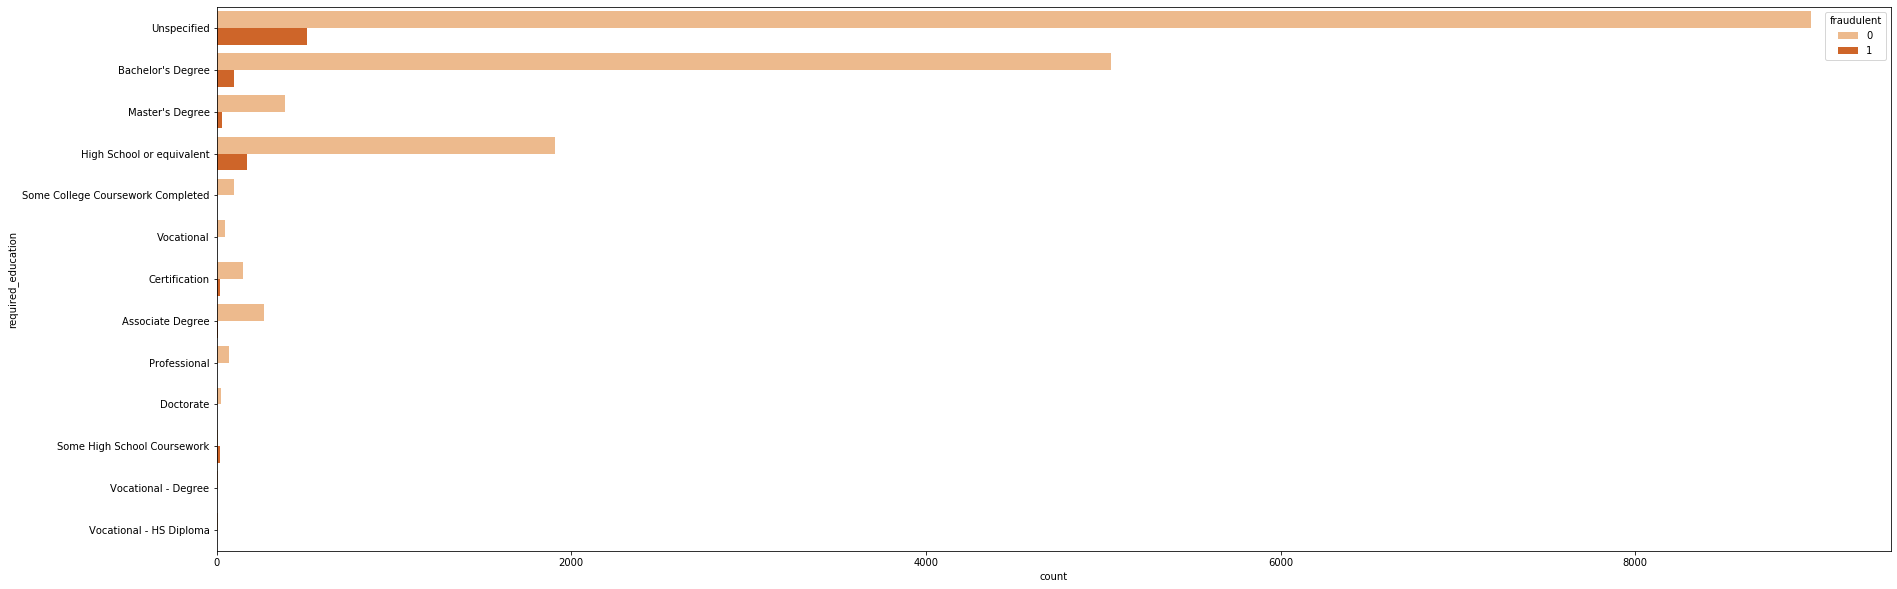

In [12]:
#slice by education 
chart = train_df[['required_education','fraudulent']]

plt.figure(figsize=(30,10))
sns.countplot(palette='Oranges', hue='fraudulent', y='required_education',data=chart)
plt.show()

#### Plotting incidence of fraud by the job function shows that Administrative and Engineering have the highest levels of fradulent postings.

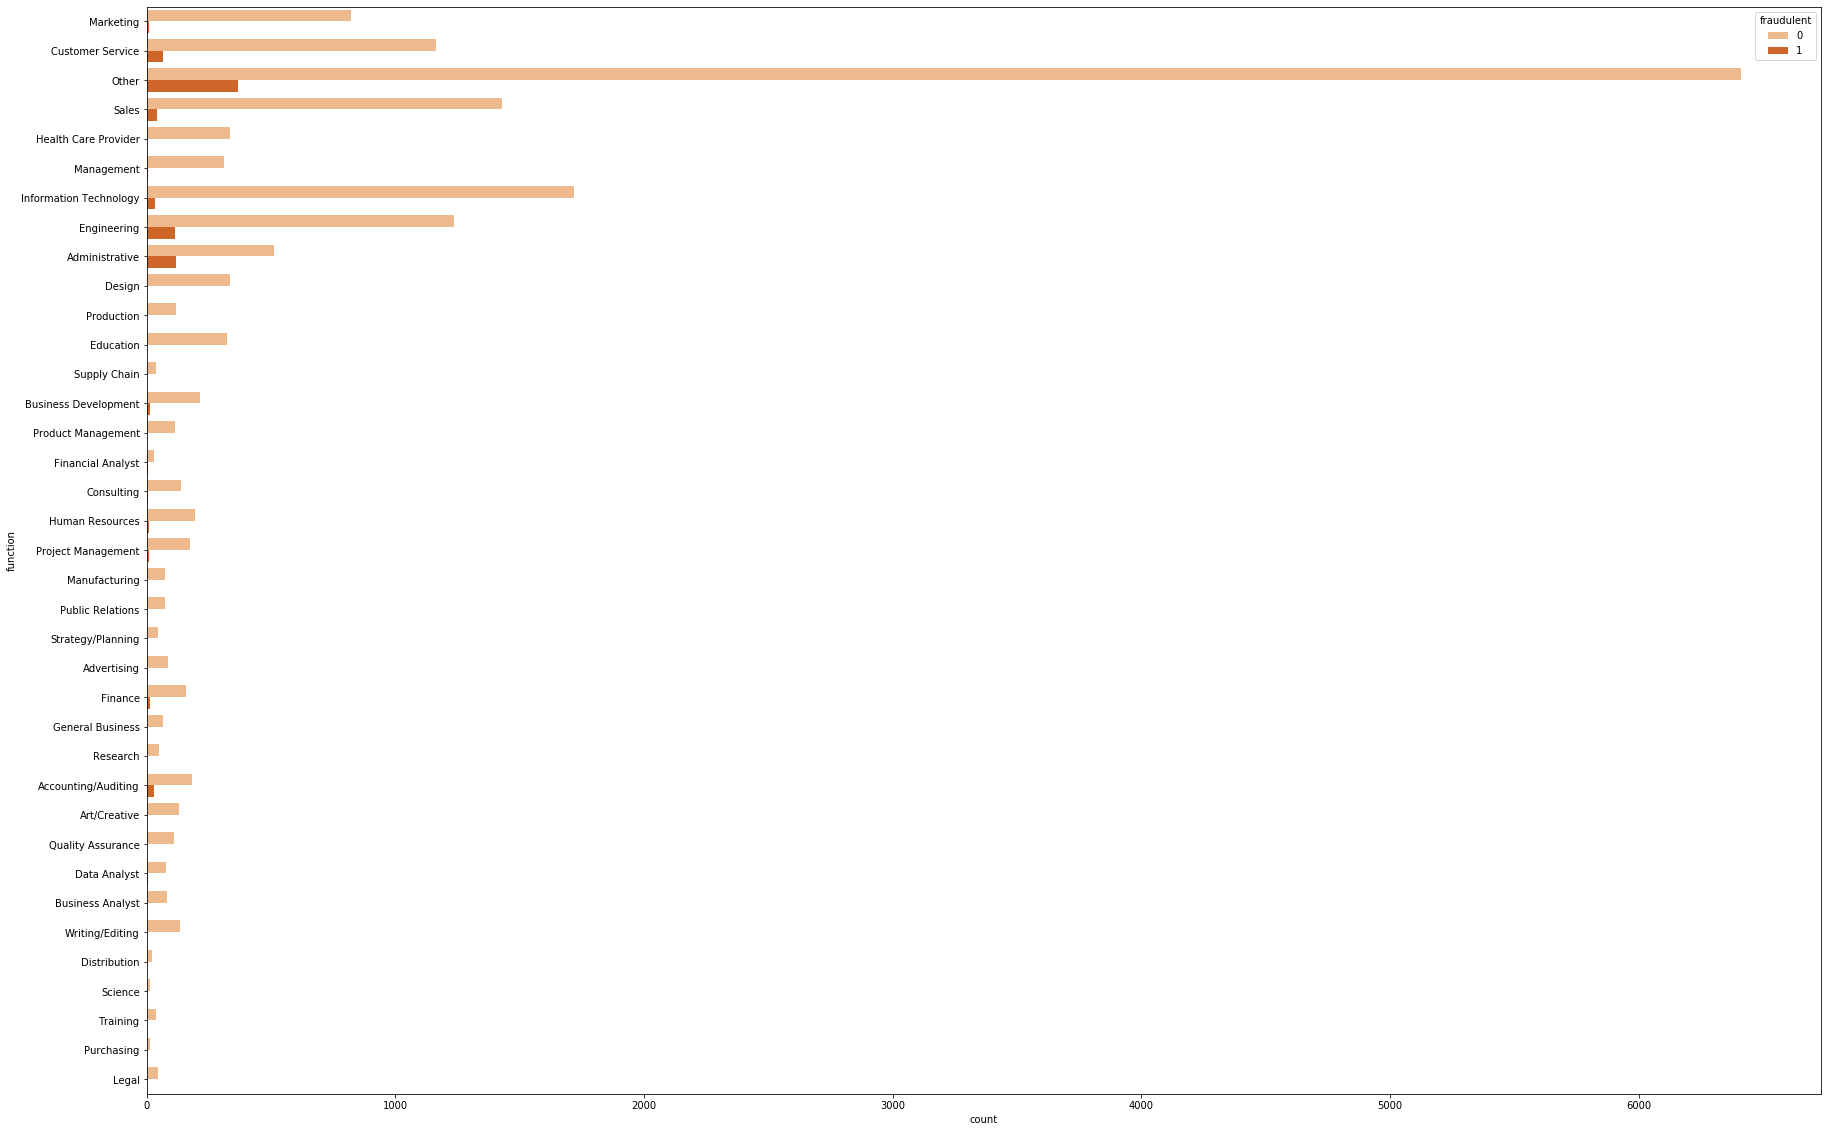

In [13]:
#slice by function
chart = train_df[['function','fraudulent']]

plt.figure(figsize=(30,20))
sns.countplot(palette='Oranges', hue='fraudulent', y='function',data=chart)
plt.show()

#### Plotting incidence of fraud by the employment type shows that Full Time postings have the highest incidence of fraud

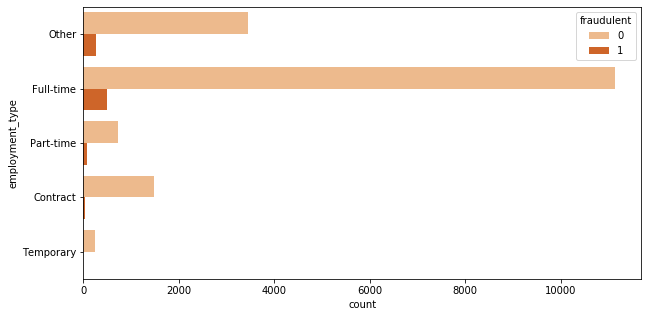

In [14]:
#slice by employment type 
chart = train_df[['employment_type','fraudulent']]

plt.figure(figsize=(10,5))
sns.countplot(palette='Oranges', hue='fraudulent', y='employment_type',data=chart)
plt.show()

#### Plotting incidence of fraud by the required experience shows that entry and mid-senior level postings have the highest incidence of fraud

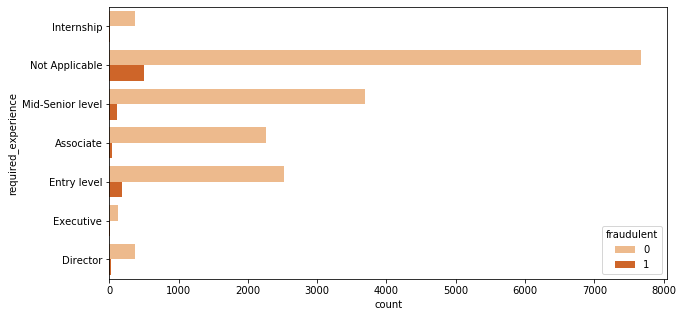

In [15]:
#slice by required experience
chart = train_df[['required_experience','fraudulent']]

plt.figure(figsize=(10,5))
sns.countplot(palette='Oranges', hue='fraudulent', y='required_experience',data=chart)
plt.show()

#### Plotting incidence of fraud by whether or not there is a company logo shows that postings with no company logo have a higher incidence of fraud. This matches my intuition that a fraud posting probably won't bother to create a logo.

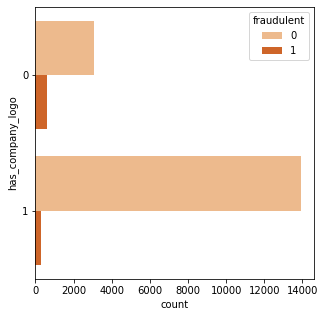

In [16]:
#slice by company logo
chart = train_df[['has_company_logo','fraudulent']]

plt.figure(figsize=(5,5))
sns.countplot(palette='Oranges', hue='fraudulent', y='has_company_logo',data=chart)
plt.show()

#### Plotting incidence of fraud by whether or not there are questions shows that postings with no questions have a higher incidence of fraud. This also matches my intuition that a fraud posting probably won't bother to create questions for job candidates.

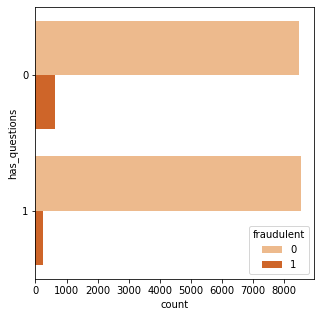

In [17]:
#slice by company logo
chart = train_df[['has_questions','fraudulent']]

plt.figure(figsize=(5,5))
sns.countplot(palette='Oranges', hue='fraudulent', y='has_questions',data=chart)
plt.show()

#### Now that I have visualized the data it is easier to understand which of the categorical attributes values are associated with higher incidence of fraud. This way I can see whether the models also identify and label fraudulent posting based on similar categorical values.

# Section 2: Build, tune and evaluate several machine learning classifier models to label fraudulent postings

#### In this section I am going to build various classifier models and then attempt to tune them to achieve higher levels of accuracy when identifying the fradulent job postings. I will split up this data set into train and test to allow the model to work on unseen data. I will also do a validation holdout on the data and plot the performance of the test vs. validation results to try and ensure my models aren't overfitting.

In [18]:
#Before attempting to convert categorical variables I'm going to drop the free text columns that can't be converted
#also I am dropping the job id column since it's an id field that won't inform the model 

train_df = train_df.drop(['job_id','company_profile','description','benefits','requirements'],axis=1)

In [19]:
#I am using pd.get_dummies to convert the categorical attributes to boolean columns to be used in the models
#Get dummies will handle creation of the new columns representing possible categorical values as numerical 1/0

train_df = pd.get_dummies(train_df, prefix_sep = '_', drop_first=True)
train_df.shape

(17880, 15864)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
np.random.seed(0)

In [21]:
# Dropping class label from features X
X = train_df.drop('fraudulent',axis=1)

# Target class label assigned to y
y = train_df['fraudulent']

# 70/30 split of train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Random Forest Classifier
#### In past assignments, I often had the highest model prediction accuracy scores using the RFC so I will try it here first. Initially I am not trying to use any hyperparameter optimization techniques.

In [22]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,classification_report
from time import time

In [23]:
rfc = RandomForestClassifier() # define the model 

start = time()
#fit the classifier to the training data 
rfc.fit(X_train, y_train)

print("RandomForestClassifier took %.2f seconds"
      % (time() - start,))

print(f"Accuracy: {round(rfc.score(X_test, y_test)*100)}%")

print("Parameters: ", rfc.get_params())

RandomForestClassifier took 48.38 seconds
Accuracy: 98.0%
Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [24]:
#print the confusion matrix and classifier scores for the model
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5143
           1       0.99      0.55      0.71       221

    accuracy                           0.98      5364
   macro avg       0.99      0.78      0.85      5364
weighted avg       0.98      0.98      0.98      5364



0 Classifier: ROC AUC=0.500
RFC Classifier: ROC AUC=0.962


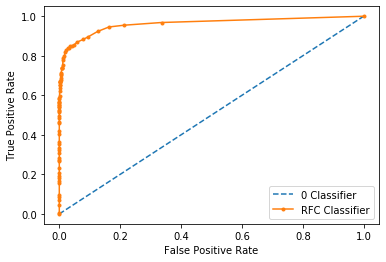

In [25]:
# plot the ROC curve and calculate the AUC
# create a classifier that always picks 0 choice (to compare result to the classifier model)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = rfc.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('0 Classifier: ROC AUC=%.3f' % (ns_auc))
print('RFC Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='0 Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RFC Classifier')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

#### On the first attempt, RFC achieved a high accuracy score of 98%, I can try to improve this score further; however first I want to try and compare this with results from other classifiers we studied in the course. However, I will define a cross validation and see whether utilizing cross validation can improve accuracy any further.

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [27]:
#calculate the cross validation score
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=16)
cv = KFold(n_splits=10, shuffle=True, random_state=16)

start = time()
results = cross_val_score(rfc, X_train, y_train, cv=cv)
print("Cross validation took %.2f seconds"
      % (time() - start,))
print(f"Accuracy: {round(results.mean()*100, 2)}%")

Cross validation took 413.10 seconds
Accuracy: 97.73%


#### Using cross-validation actually reduces the accuracy slightly by about 0.2%, I need to modify the default parameters of the cv further to improve this.  

#### Next I want to get the relative feature importance for the features used by the RFC. Printing this out I can see that 'has_company-logo' had the highest importance in this model; which aligns with what I saw during visualization of the data as well, most fraud was associated with no logo. We also see Administrative positions as having somewhat importance; which also aligns with the correlations seen earlier.

In [28]:
#obtain the relative feature importance of the rf classifier
feature_imp = pd.DataFrame(rfc.feature_importances_, index=X_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
has_company_logo,0.036937
industry_Oil & Energy,0.017447
"location_US, TX, Houston",0.015252
title_Data Entry Admin/Clerical Positions - Work From Home,0.014794
function_Administrative,0.014378
...,...
title_Risk Analyst,0.000000
title_Rising Star (3rd Key Holder) - St. Louis Galleria,0.000000
title_Rising Star (3rd Key Holder) - Oakbrook Center,0.000000
title_Rising Star (3rd Key Holder) - Kenwood Towne Centre,0.000000


### K Nearest Neighbors Classifier 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier()

start = time()
#fit the classifier to the training data 
knn.fit(X_train, y_train)

print("KNeighborsClassifier took %.2f seconds"
      % (time() - start,))

print(f"Accuracy: {round(knn.score(X_test, y_test)*100)}%")
print("Parameters: ", knn.get_params())

KNeighborsClassifier took 27.72 seconds
Accuracy: 98.0%
Parameters:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [33]:
#print the confusion matrix and classifier scores for the model
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5143
           1       0.76      0.65      0.70       221

    accuracy                           0.98      5364
   macro avg       0.87      0.82      0.85      5364
weighted avg       0.98      0.98      0.98      5364



#### With no special modifications or parameter tunings on fixed parameters inputs, the K nearest neighbors classifier achieves a relatively high average accuracy of 98%. 

0 Classifier: ROC AUC=0.500
KNN Classifier: ROC AUC=0.921


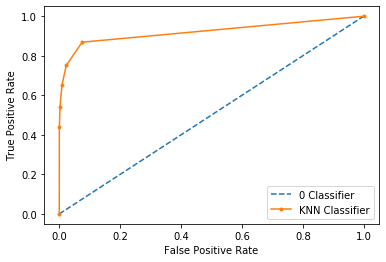

In [34]:
# plot the ROC curve and calculate the AUC
# create a classifier that always picks 0 choice (to compare result to the classifier model)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = knn.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('0 Classifier: ROC AUC=%.3f' % (ns_auc))
print('KNN Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='0 Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN Classifier')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### Gaussian Naieve Bayes Classifier 

In [35]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb = GaussianNB()

start = time()
#fit the classifier to the training data 
nb.fit(X_train, y_train)
print("Naieve Bayes Classifier took %.2f seconds"
      % (time() - start,))

y_pred = nb.predict(X_test)
print(f"Accuracy: {round(nb.score(X_test, y_test)*100)}%")
print("Parameters: ", nb.get_params())

Naieve Bayes Classifier took 9.53 seconds
Accuracy: 81.0%
Parameters:  {'priors': None, 'var_smoothing': 1e-09}


In [38]:
#print the confusion matrix and classifier scores for the model
y_pred = nb.predict(X_test)
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      5143
           1       0.16      0.85      0.27       221

    accuracy                           0.81      5364
   macro avg       0.58      0.83      0.58      5364
weighted avg       0.96      0.81      0.87      5364



#### With no special modifications or parameter tunings on fixed parameters inputs, the Gaussian Naieve Bayes classifier achieves a accuracy score of 81%. 

0 Classifier: ROC AUC=0.500
NB Classifier: ROC AUC=0.831


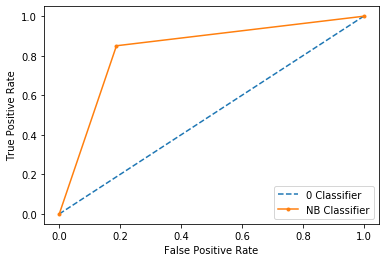

In [43]:
# plot the ROC curve and calculate the AUC
# create a classifier that always picks 0 choice (to compare result to the classifier model)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = nb.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('0 Classifier: ROC AUC=%.3f' % (ns_auc))
print('NB Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='0 Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='NB Classifier')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### Ada Boosting Classifier

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
num_trees = 100
ada = AdaBoostClassifier(n_estimators=num_trees, random_state=16)
start = time()
ada.fit(X_train, y_train)
results = cross_val_score(ada, X_train, y_train, cv=cv)
print("AdaBoostingClassifier took %.2f seconds"
      % (time() - start,))
print(f"Accuracy: {round(results.mean()*100, 2)}%")

AdaBoostingClassifier took 1939.48 seconds
Accuracy: 96.56%


In [45]:
print("Parameters: ", ada.get_params())

Parameters:  {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 16}


In [46]:
#obtain the relative feature importance of the rf classifier
feature_imp = pd.DataFrame(ada.feature_importances_, index=X_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
has_company_logo,0.05
"location_US, TX, Houston",0.02
employment_type_Full-time,0.02
industry_Hospital & Health Care,0.02
"location_US, CA, San Mateo",0.02
...,...
title_Junior Accounts Assistant,0.00
title_Junior Adwords/SEO Specialist,0.00
title_Junior Affiliate Manager,0.00
title_Junior Airframe Structures Design Engineer,0.00


In [42]:
#print the confusion matrix and classifier scores for the model
y_pred = ada.predict(X_test)
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5143
           1       0.74      0.46      0.57       221

    accuracy                           0.97      5364
   macro avg       0.86      0.73      0.78      5364
weighted avg       0.97      0.97      0.97      5364



#### With no special modifications or parameter tunings on fixed parameters inputs, the Ada Boosting classifier achieves a accuracy score of 96.56%.

0 Classifier: ROC AUC=0.500
ADA Classifier: ROC AUC=0.930


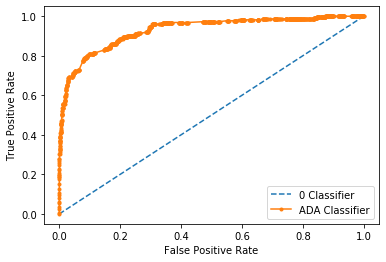

In [44]:
# plot the ROC curve and calculate the AUC
# create a classifier that always picks 0 choice (to compare result to the classifier model)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = ada.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('0 Classifier: ROC AUC=%.3f' % (ns_auc))
print('ADA Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='0 Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='ADA Classifier')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### Tracking Model Performance
#### Here I am documenting the accuracy scores captured for each of the models when running on the train/test data split. As can be seen in the chart below, the ensemble and KNN models generally performed the best, however the NB classifier also performed comparably. Scores below are the weighted average accuracy.

|Model Name|Type|Optimizer/Param selection|Cross-validation|Accuracy score|
|:--|:--|:--|:--|:--|
|rfc|Random Forest Classifier|num_estimators=100, criterion=gini, boostrap=true|N/A|98.0|
|rfc|Random Forest Classifier With CV|num_estimators=100,criterion=gini, boostrap=true|Shuffle-Split, KFold|97.73|
|knn|K Nearest Neighbors Classifier|k_neighbors=5|N/A|98.0|
|ada|Ada Boosting Classifier|num_trees=100|N/A|96.56|
|nb|Gaussian Naieve Bayes Classifier|N/A|N/A|81.0|


# Conclusions

### Ensemble learning methods Random Forest and Ada Boosting work well on this data set due to the relative predictive power of the categorical features in the data and also that they are uncorrelated, so the individual decision trees can operate relatively independently to increase the total accuracy gain.

### Likewise K Nearest Neighbors with a K=5 achieved satisfactory results.  Again I think the KNN classifier performs well because there are certain features similarities shared between the true and fake job ads that make it possible for the KNN classifier to make an accurate prediction.

### Gaussian Naieve Bayes performed with a relatively high accuracy but not as high as the prior models; this I believe is more to the structure of the data (not in a normally distributed format) making it so that the NB classifier may not be as well-suited a model for this structure data. 